<a href="https://colab.research.google.com/github/akashbose02/Customer-Segmentation/blob/main/Customer_Segmentation%20and%20CLV%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data_path = '/content/Customers_group.csv'
customer_df = pd.read_csv(data_path)
print("Preview of the dataset:")
print(customer_df.head())



Preview of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
features = customer_df.iloc[:, [3, 4]].values
print("Extracted Features (Annual Income, Spending Score):")
print(features[:10])

Extracted Features (Annual Income, Spending Score):
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


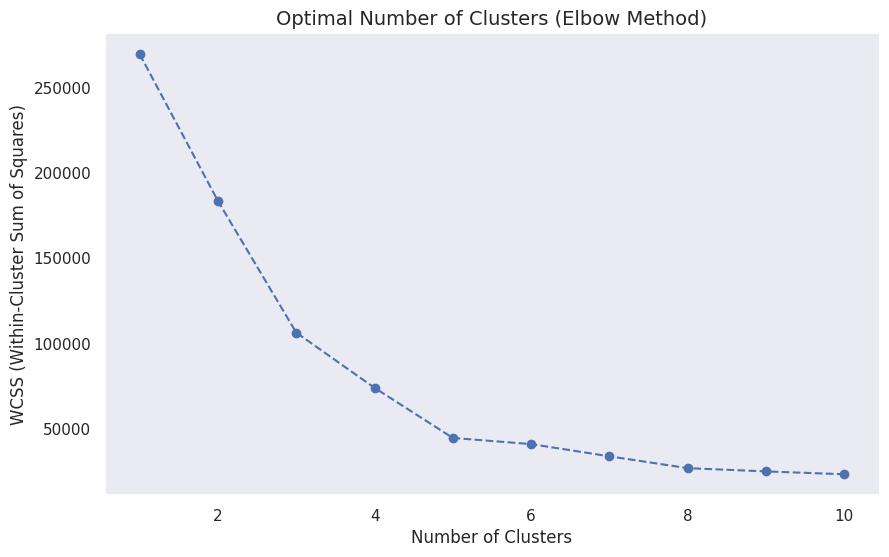

In [ ]:
wcss_values = []
for n_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans_model.fit(features)
    wcss_values.append(kmeans_model.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_values, marker='o', linestyle='--')
plt.title('Optimal Number of Clusters (Elbow Method)', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.grid()
plt.show()


In [ ]:
optimal_clusters = 5
kmeans_model = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans_model.fit_predict(features)
print("Cluster Labels for Each Data Point:")
print(cluster_labels)


Cluster Labels for Each Data Point:
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


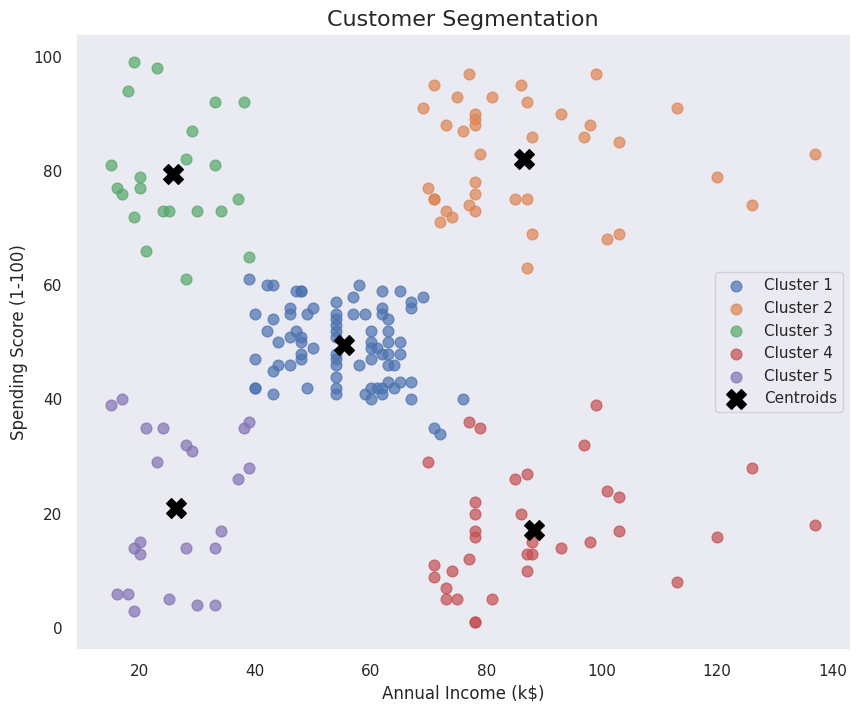

In [ ]:
plt.figure(figsize=(10, 8))

colors = ['green', 'red', 'yellow', 'violet', 'blue']
cluster_names = [f"Cluster {i+1}" for i in range(optimal_clusters)]

for cluster in range(optimal_clusters):
    plt.scatter(features[cluster_labels == cluster, 0],
                features[cluster_labels == cluster, 1],
                s=60,
                label=cluster_names[cluster],
                alpha=0.7)
plt.scatter(kmeans_model.cluster_centers_[:, 0],
            kmeans_model.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.title('Customer Segmentation', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend()
plt.grid()
plt.show()


In [ ]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']  # Corrected column names
X = customer_df[features]
customer_df['Customer Lifetime Value'] = np.random.randint(1000, 10000, customer_df.shape[0])
y = customer_df['Customer Lifetime Value']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
results = pd.DataFrame({'Actual CLV': y_test, 'Predicted CLV': y_pred})
results.head()





Mean Squared Error (MSE): 6384705.26
R-squared (R2): 0.03


,Actual CLV,Predicted CLV
95,3903,5688.390980
15,7947,6196.423547
30,9898,5054.239510
158,3759,4881.906969
128,1189,5049.274981
